In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
class read_count:
    def __init__(self, f) -> None:
        self.f = f
        self.name = f.split("/")[5].split("_")[0]
        self.df = self.set_df()
        pass

    def set_df(self) -> pd.DataFrame:
        df = pd.read_csv(self.f, sep="\t", skiprows=4, header=None, index_col=0, names=["net", "+", "-"])
        all_read = df["net"].sum()
        df = df / all_read * 1e06 + 1e-10
        df["log2"] = np.log(df["net"]) / np.log(2)
        return df


In [85]:
f_WT = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/Col_1_ReadsPerGene.out.tab'
f_ago1 = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/ago1_1_ReadsPerGene.out.tab'
f_AGO1 = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/AGO1_3_ReadsPerGene.out.tab'
f_deltaN = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/deltaN_1_9_ReadsPerGene.out.tab'

WT = read_count(f_WT)
AGO1 = read_count(f_AGO1)
ago1 = read_count(f_ago1)
deltaN = read_count(f_deltaN)

In [86]:
WT.df

,net,+,-,log2
AT1G01010,1.004545e+01,1.000000e-10,1.004545e+01,3.328471
AT1G01020,1.171970e+01,1.000000e-10,1.171970e+01,3.550863
AT1G01030,6.696969e+00,1.000000e-10,6.696969e+00,2.743508
AT1G01040,5.381493e+01,2.152597e+00,5.381493e+01,5.749935
AT1G01046,1.000000e-10,1.000000e-10,1.000000e-10,-33.219281
...,...,...,...,...
ATCG01270,1.000000e-10,1.000000e-10,1.000000e-10,-33.219281
ATCG01280,4.783549e-01,1.000000e-10,4.783549e-01,-1.063847
ATCG01290,1.000000e-10,1.000000e-10,1.000000e-10,-33.219281
ATCG01300,1.913420e+00,1.000000e-10,1.913420e+00,0.936153


In [123]:
def MA_plot(control:read_count, treat:read_count) -> pd.DataFrame:
    M = treat.df["log2"] - control.df["log2"]
    A = ( treat.df["log2"] + control.df["log2"] ) / 2
    plt.scatter(A, M, s=3)
    plt.xlim(-5)
    plt.ylim(-15,15)
    plt.axhline(0, c="gray")
    plt.title(f"{control.name} vs {treat.name}")
    return M[M > 1]

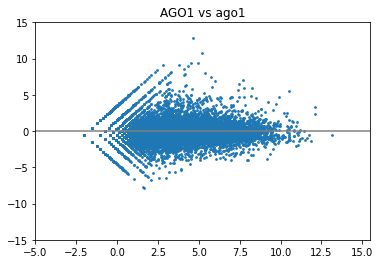

In [124]:
up = MA_plot(AGO1, ago1)

In [125]:
AGO1_target = deltaN.df.loc[up.index, "log2"]
AGO1_target_deltaN_down = AGO1_target[AGO1_target<0]
AGO1_target_deltaN_up = AGO1_target[AGO1_target>0]

In [126]:
AGO1_target_deltaN_down.to_csv("/Users/siomi19/Desktop/AtAgo1 RNA-seq/AGO1_target_deltaN_down.tsv", sep="\t", index=True, header=True)
AGO1_target_deltaN_down.sort_values().to_csv("/Users/siomi19/Desktop/AtAgo1 RNA-seq/AGO1_target_deltaN_down_sorted.tsv", sep="\t", index=True, header=True)
AGO1_target_deltaN_up.to_csv("/Users/siomi19/Desktop/AtAgo1 RNA-seq/AGO1_target_deltaN_up.tsv", sep="\t", index=True, header=True)
AGO1_target_deltaN_up.sort_values(ascending=False).to_csv("/Users/siomi19/Desktop/AtAgo1 RNA-seq/AGO1_target_deltaN_up_sorted.tsv", sep="\t", index=True, header=True)

(array([680.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 295., 835., 996., 865., 493., 140.,  30.]),
 array([-33.21928095, -30.93758535, -28.65588976, -26.37419416,
        -24.09249856, -21.81080297, -19.52910737, -17.24741178,
        -14.96571618, -12.68402058, -10.40232499,  -8.12062939,
         -5.8389338 ,  -3.5572382 ,  -1.2755426 ,   1.00615299,
          3.28784859,   5.56954418,   7.85123978,  10.13293538,
         12.41463097]),
 <BarContainer object of 20 artists>)

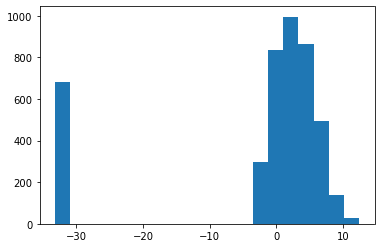

In [108]:
plt.hist(deltaN.df.loc[down.index, "log2"], bins=20)

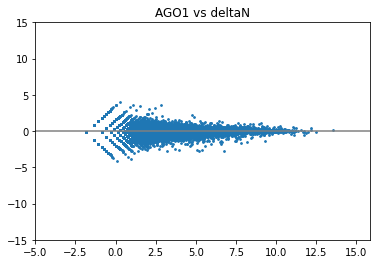

In [129]:
a = MA_plot(AGO1, deltaN)
a.sort_values(ascending=False).to_csv("/Users/siomi19/Desktop/AtAgo1 RNA-seq/AGO1_vs_deltaN_up.tsv", sep="\t", index=True, header=True)

In [130]:
a

AT1G01370     1.030890
AT1G02030    32.263838
AT1G02440    31.263838
AT1G02530    32.263838
AT1G02620     1.349066
               ...    
ATCG01060     1.808497
ATCG01070     1.393460
ATCG01080     1.634468
ATCG01090     1.162134
ATCG01100     1.112651
Name: log2, Length: 1613, dtype: float64

In [47]:
log2_AGO1_ago1 = np.log(dfs["ago1"]["net"]/dfs["AGO1"]["net"])/np.log(2)

In [44]:
log2_AGO1_ago1

AT1G01010    1.435865
AT1G01020    0.127335
AT1G01030   -0.427631
AT1G01040    0.409735
AT1G01046    0.000000
               ...   
ATCG01270    0.000000
ATCG01280   -0.510074
ATCG01290    0.000000
ATCG01300    0.004479
ATCG01310    0.344054
Name: net, Length: 33602, dtype: float64

In [35]:
df_log2_AGO1_ago1

,Log2FC
AT1G01010,NaN
AT1G01020,NaN
AT1G01030,NaN
AT1G01040,NaN
AT1G01046,NaN
...,...
ATCG01270,NaN
ATCG01280,NaN
ATCG01290,NaN
ATCG01300,NaN


In [19]:
dfs[0]["df"]

,net,+,-
AT1G01010,42,0,42
AT1G01020,49,0,49
AT1G01030,28,0,28
AT1G01040,225,9,225
AT1G01046,0,0,0
...,...,...,...
ATCG01270,0,0,0
ATCG01280,2,0,2
ATCG01290,0,0,0
ATCG01300,8,0,8


In [11]:
df

,net,+,-
AT1G01010,44,0,44
AT1G01020,38,2,36
AT1G01030,34,0,34
AT1G01040,188,7,188
AT1G01046,0,0,0
...,...,...,...
ATCG01270,0,0,0
ATCG01280,2,1,1
ATCG01290,0,0,0
ATCG01300,6,0,6
